In [1]:
from matplotlib import pyplot as plt
import numpy as np
import shap

from lxh_prediction.explain_model import explain_with_shape_lgbm


feat_collection = "top20_non_lab"
explainer, X, feature_names = explain_with_shape_lgbm(feat_collection)

shap_values = explainer.shap_values(X)[1]
expected_value = explainer.expected_value[1]


Found `num_boost_round` in params. Will use it instead of argument
Found `early_stopping_round` in params. Will use it instead of argument
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [2]:
import pandas as pd


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def desigmoid(p):
    return np.log(p / (1 - p))


shap_v = pd.DataFrame(shap_values, columns=X.columns)
phi0 = expected_value

RR = sigmoid(shap_v + phi0) / sigmoid(phi0)


def plot_relative_risk(name, xlim=None):
    fig = plt.figure(figsize=(5, 5), dpi=100)
    if xlim is not None:
        plt.xlim(xlim)
    shap.dependence_plot(
        name,
        RR.values,
        X,
        display_features=X,
        interaction_index=None,
        feature_names=feature_names,
        ax=fig.gca(),
        show=False,
    )
    fig.gca().set_ylabel("Relative Risk for diabetes")


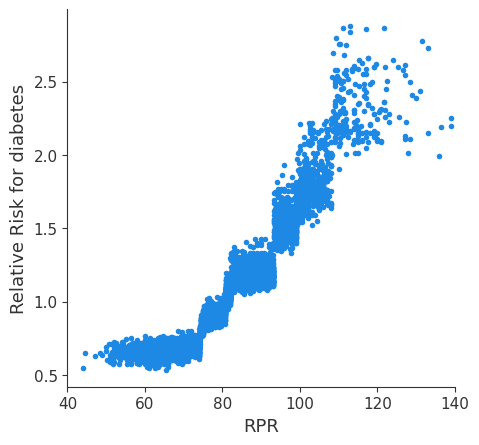

In [3]:
plot_relative_risk("RPR", xlim=(40, 140))


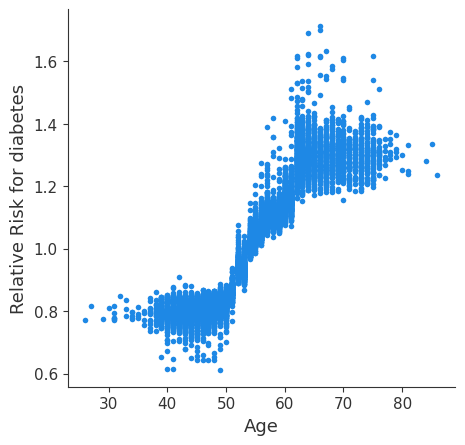

In [5]:
plot_relative_risk("Age")


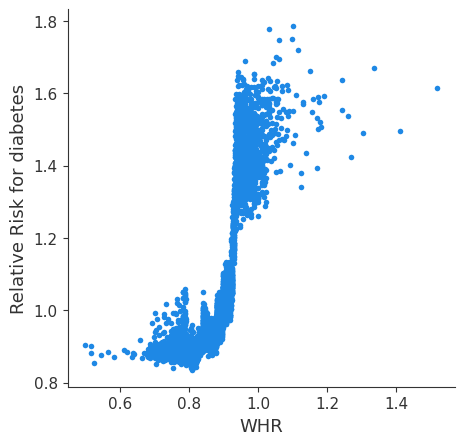

In [6]:
plot_relative_risk("WHR")


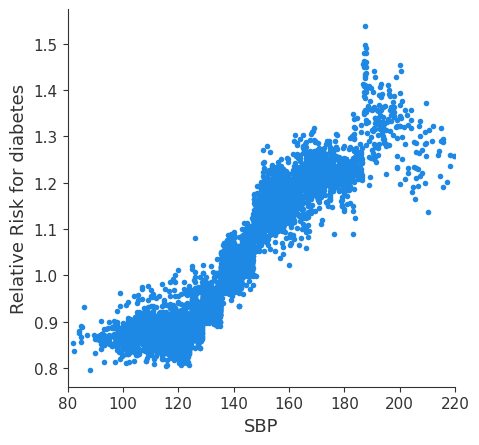

In [7]:
plot_relative_risk("SBP", xlim=(80, 220))


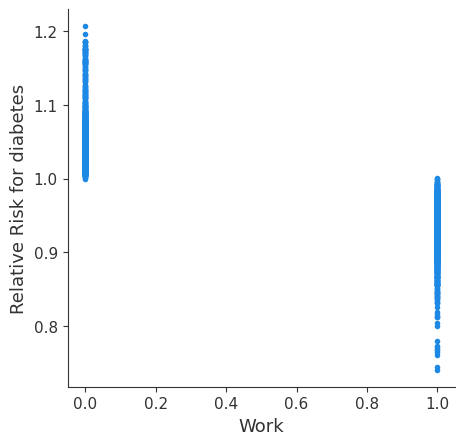

In [8]:
plot_relative_risk("Work")


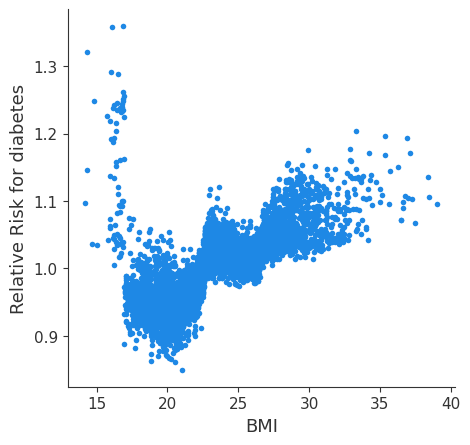

In [9]:
plot_relative_risk("BMI")


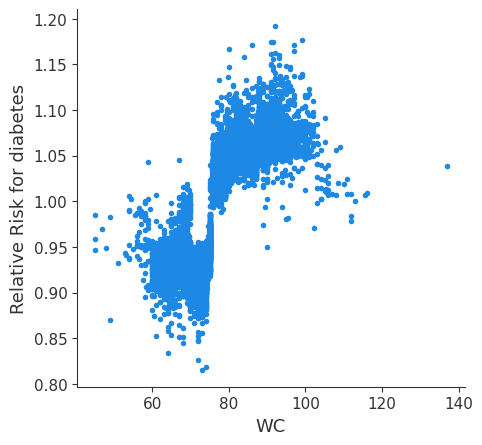

In [10]:
plot_relative_risk("WC")


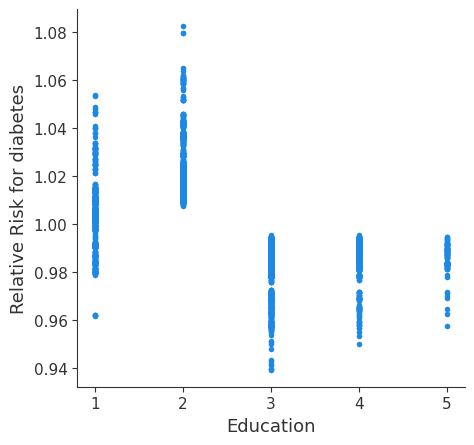

In [11]:
plot_relative_risk("Education")


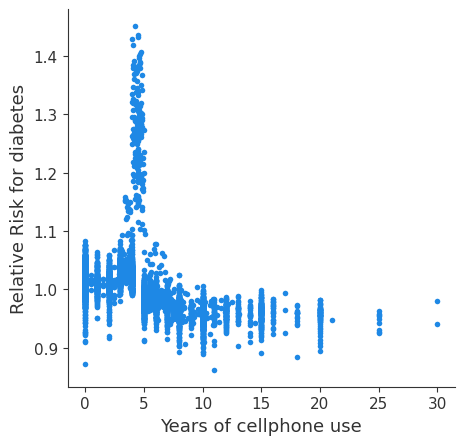

In [13]:
plot_relative_risk("Years of cellphone use")


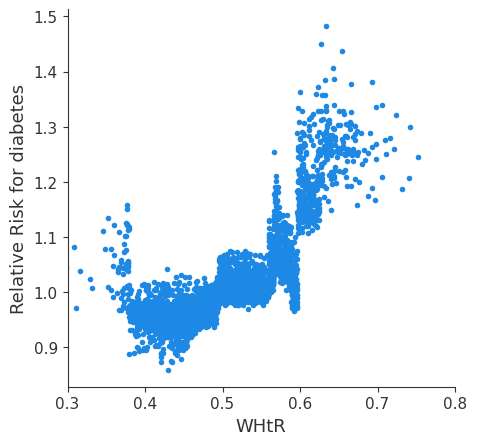

In [15]:
plot_relative_risk("WHtR", xlim=(0.3, 0.8))
